# Task 1 - Exploratory Data Analysis (EDA)

##  Loading the Data

In [1]:
import pandas as pd

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display first few rows
print(customers.head())
print(products.head())
print(transactions.head())


C:\Users\dorad\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

Basic Data Exploration

## Exploring the Structure and Missing Values


In [5]:
# Basic info
print(customers.info())
print(products.info())
print(transactions.info())

# Missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

1) To Check the structure, data types, and missing values.

2) To Summarize the numerical and categorical data

# Merging the Datasets for deeper analysis.

In [6]:
# Merge datasets
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

# Display the first few rows of the merged dataset
print("\nMerged Dataset:")
print(merged_data.head())



Merged Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving 

## Performing EDA to Visualize and analyze key trends in the data.

1. Distribution of Sales Across Regions

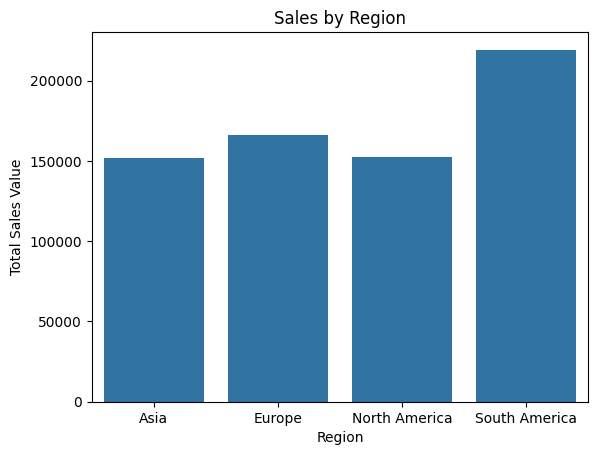

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sales by region
region_sales = merged_data.groupby('Region')['TotalValue'].sum().reset_index()

# Plot
sns.barplot(data=region_sales, x='Region', y='TotalValue')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Value')
plt.show()


Explanation:
I analyzed sales distribution across regions to identify high-performing markets. A bar chart was created to visualize total sales in each region.

2. Most Popular Product Categories

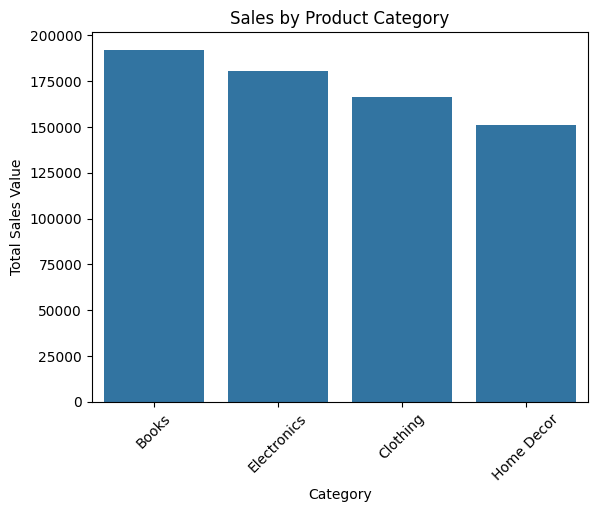

In [8]:
# Total sales by category
category_sales = merged_data.groupby('Category')['TotalValue'].sum().reset_index()

# Plot
sns.barplot(data=category_sales, x='Category', y='TotalValue', order=category_sales.sort_values('TotalValue', ascending=False)['Category'])
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()


Explanation:
To determine customer preferences, I analyzed product categories with the highest sales. This insight can help focus marketing efforts on popular categories.

3. Customer Signup Trends

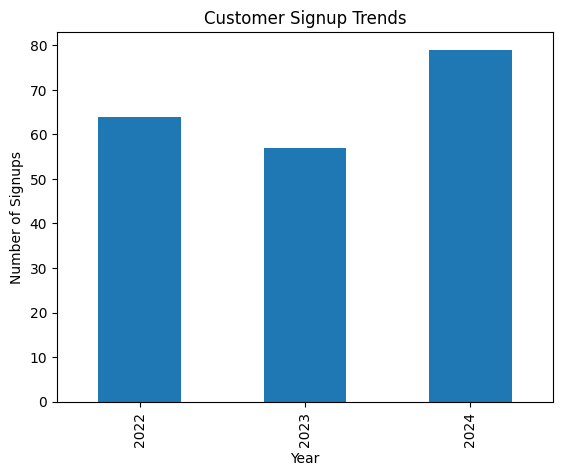

In [9]:
# Convert SignupDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Signup trends by year
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()

# Plot
signup_trends.plot(kind='bar', title='Customer Signup Trends', xlabel='Year', ylabel='Number of Signups')
plt.show()


Explanation:
I examined customer signup trends over the years to understand user acquisition patterns. This information is valuable for assessing growth.

4. Top Products by Quantity Sold

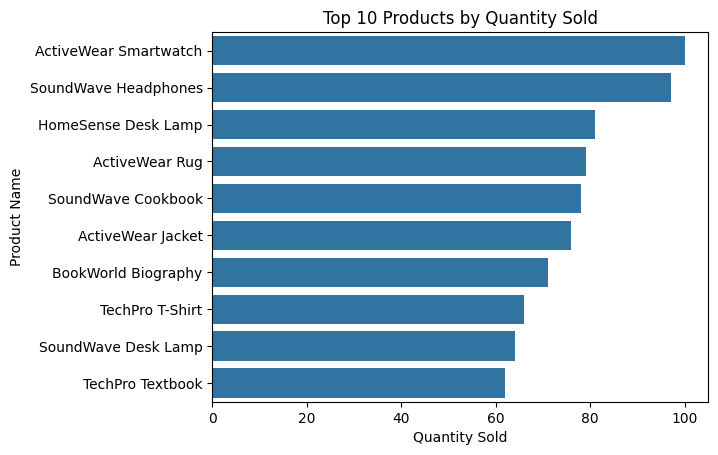

In [10]:
# Top products by quantity sold
top_products = merged_data.groupby('ProductName')['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False).head(10)

# Plot
sns.barplot(data=top_products, x='Quantity', y='ProductName')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()


Explanation:
I identified the top-selling products to pinpoint items driving revenue. Visualizing the top 10 products provided actionable insights for inventory and marketing strategies.

5. Monthly Transaction Trends

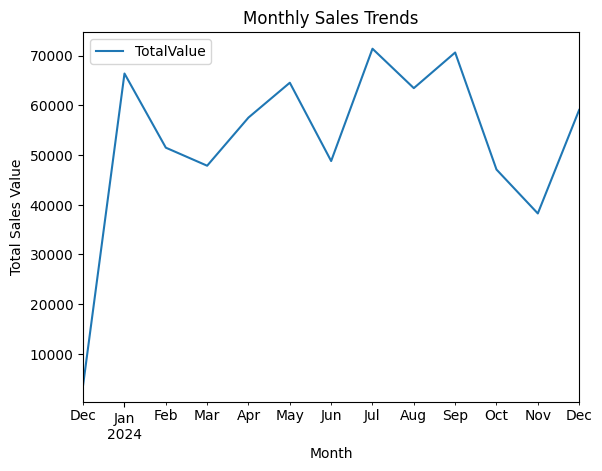

In [12]:
# Extract transaction month and year
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')

# Monthly sales
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum().reset_index()

# Plot
monthly_sales.plot(x='Month', y='TotalValue', kind='line', title='Monthly Sales Trends', xlabel='Month', ylabel='Total Sales Value')
plt.show()


Explanation:
Monthly transaction trends helped identify peak sales periods, enabling targeted promotional campaigns

# Business Insights from EDA


1. Regional Sales Distribution:
South America leads in total sales, surpassing other regions significantly. This suggests strong market potential in South America, while other regions like Asia and North America might require enhanced marketing strategies to boost sales.


2. Dominance of Books in Product Categories:
The Books category has the highest sales, followed closely by Electronics. This highlights customer preference for literature and technology-related products, making them prime candidates for targeted advertising and inventory expansion.


3. Customer Signup Trends:
A significant growth in customer signups occurred in 2024, surpassing previous years. This indicates the effectiveness of recent marketing campaigns or product launches during this period, which can be further analyzed for repeat success.


4. Top-Selling Products:
The ActiveWear Smartwatch is the most sold product, followed by SoundWave Headphones and HomeSense Desk Lamp. These products drive significant sales volume, emphasizing the need for maintaining adequate stock and promoting these items further.


5. Seasonal Sales Trends:
Monthly sales trends indicate high sales during December (holiday season) and mid-year months like May, July, and August. These patterns suggest the need to focus on both holiday and mid-year promotional strategies, ensuring adequate stock and marketing efforts during these periods to maximize revenue opportunities.